In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv1D
from keras.layers import Bidirectional
from keras.layers import LSTM
from keras.layers import SimpleRNN
from keras.layers import Flatten
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

Date
2017-01-01     998.325012
2017-01-02    1021.750000
2017-01-03    1043.839966
2017-01-04    1154.729980
2017-01-05    1013.380005
                 ...     
2019-12-27    7290.088379
2019-12-28    7317.990234
2019-12-29    7422.652832
2019-12-30    7292.995117
2019-12-31    7193.599121
Name: Close, Length: 1095, dtype: float64


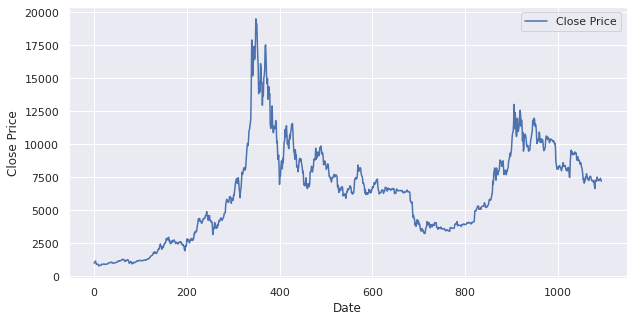

In [35]:
path = '/content/drive/MyDrive/Research Papers/Predicting Bitcoin Price/Dataset/BTC-USD.csv'
dataframe = pd.read_csv(path)
dataframe = dataframe.set_index(pd.DatetimeIndex(dataframe['Date']))['Close']
print(dataframe)
dataset = dataframe.values
dataset = dataset.astype(float).reshape(-1, 1)

sns.set(rc = {'figure.figsize':(10, 5)})
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(dataset, label = 'Close Price')
plt.legend()

# img = 'Actual_Close_Price'
# plt.savefig(f'/content/drive/MyDrive/Research Papers/Predicting Bitcoin Price/Image/{img}.pdf', dpi = 256, bbox_inches = "tight")

plt.show()

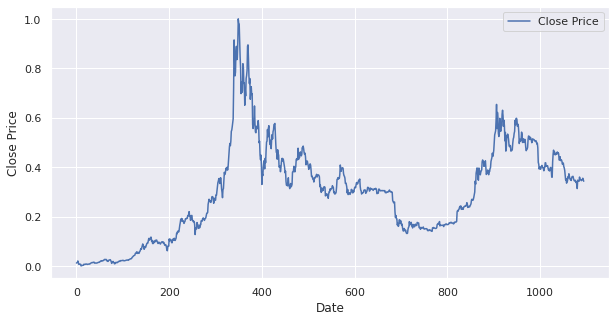

In [36]:
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)

sns.set(rc={'figure.figsize':(10, 5)})
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(dataset, label = 'Close Price')
plt.legend()

# img = 'Normalization_Close_Price'
# plt.savefig(f'/content/drive/MyDrive/Research Papers/Predicting Bitcoin Price/Image/{img}.pdf', dpi = 256, bbox_inches = "tight")

plt.show()

In [37]:
# Split Data into Train Set, Validation Set and Test Set
test_size = 110
validation_size = 110
train_size = len(dataset) - validation_size - test_size

train = dataset[0 : train_size]
validation = dataset[train_size : train_size + validation_size]
test = dataset[len(dataset) - test_size : len(dataset)]

print(train_size, validation_size, test_size)

875 110 110


In [38]:
# Convert an array of values into a dataset matrix
def create_dataset(dataset, window_size):
	dataX, dataY = [], []
	for i in range(len(dataset) - window_size):
		dataX.append(dataset[i : (i + window_size), 0])
		dataY.append(dataset[i + window_size, 0])
	return np.array(dataX), np.array(dataY)

In [39]:
# Reshape into X=t and Y=t+1
window_size = 10
trainX, trainY = create_dataset(train, window_size)
validX, validY = create_dataset(validation, window_size)
testX, testY = create_dataset(test, window_size)

In [40]:
# Reshape input to [Samples, Time Steps, Features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
validX = np.reshape(validX, (validX.shape[0], 1, validX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [41]:
# Proposed Model
model = Sequential()
model.add(Conv1D(filters = 32, kernel_size = 5, padding = 'same', activation = 'relu', input_shape = (1, window_size)))
model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(LSTM(32, return_sequences=True))
model.add(Bidirectional(SimpleRNN(32, return_sequences=True)))
model.add(SimpleRNN(32))
model.add(Dense(1))
model.compile(loss = 'mean_absolute_error', optimizer = 'Adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 1, 32)             1632      
_________________________________________________________________
bidirectional_2 (Bidirection (None, 1, 64)             16640     
_________________________________________________________________
lstm_3 (LSTM)                (None, 1, 32)             12416     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 1, 64)             4160      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 32)                3104      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 37,985
Trainable params: 37,985
Non-trainable params: 0
__________________________________________________

In [42]:
# history = model.fit(trainX, trainY, validation_data = (validX, validY), epochs = 512, batch_size = 64, verbose = 0, shuffle = False)

In [43]:
# history.history.keys()

In [44]:
# sns.set(rc={'figure.figsize':(10, 5)})
# plt.plot(history.history['loss'], label = 'Loss')
# plt.plot(history.history['val_loss'], label = 'Val Loss')
# plt.xlabel("Epochs")
# plt.ylabel("Loss")
# plt.legend()
# plt.show()

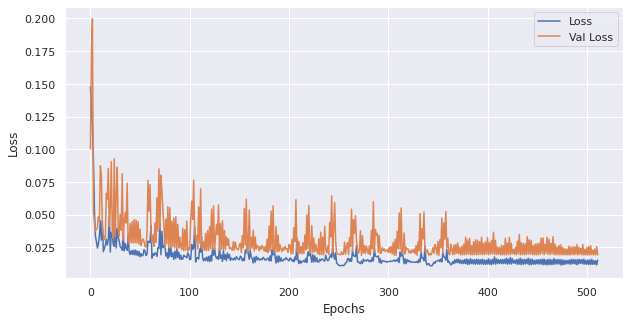

In [45]:
lsvls = '/content/drive/MyDrive/Research Papers/Predicting Bitcoin Price/CSV/Loss_vs_Epochs_Proposed_Model.csv'
ls = pd.read_csv(lsvls, usecols=[0])
vls = pd.read_csv(lsvls, usecols=[1])

sns.set(rc={'figure.figsize':(10, 5)})
plt.plot(ls, label = 'Loss')
plt.plot(vls, label = 'Val Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# img = 'Loss_vs_Epochs_Proposed_Model'
# plt.savefig(f'/content/drive/MyDrive/Research Papers/Predicting Bitcoin Price/Image/{img}.pdf', dpi = 256, bbox_inches = "tight")

plt.show()

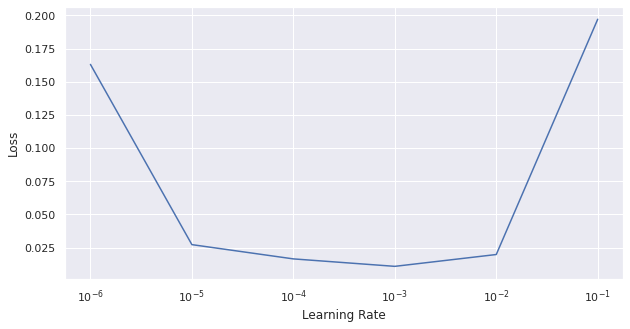

In [46]:
lslr = '/content/drive/MyDrive/Research Papers/Predicting Bitcoin Price/CSV/Loss_vs_Learning_Rate_Proposed_Model.csv'
ls = pd.read_csv(lslr, usecols=[0])
lr = pd.read_csv(lslr, usecols=[1])

sns.set(rc={'figure.figsize':(10, 5)})
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.semilogx(ls, lr)

# img = 'Loss_vs_Learning_Rate_Proposed_Model'
# plt.savefig(f'/content/drive/MyDrive/Research Papers/Predicting Bitcoin Price/Image/{img}.png', dpi = 256, bbox_inches = "tight")

plt.show()

In [47]:
# model.save_weights('/content/drive/MyDrive/Research Papers/Predicting Bitcoin Price/ModelTest/Proposed_Model.h5')

In [48]:
model.load_weights('/content/drive/MyDrive/Research Papers/Predicting Bitcoin Price/Model/Proposed_Model.h5')

In [49]:
# Make predictions
trainPredict = model.predict(trainX)
validPredict = model.predict(validX)
testPredict = model.predict(testX)

In [50]:
# Invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])

validPredict = scaler.inverse_transform(validPredict)
validY = scaler.inverse_transform([validY])

testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [51]:
# Mean Absolute Percentage Error
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [52]:
trainC, trainP = trainY[0], trainPredict[ : , 0]
validC, validP = validY[0], validPredict[ : , 0]
testC, testP = testY[0], testPredict[ : , 0]

cdf_range = 3

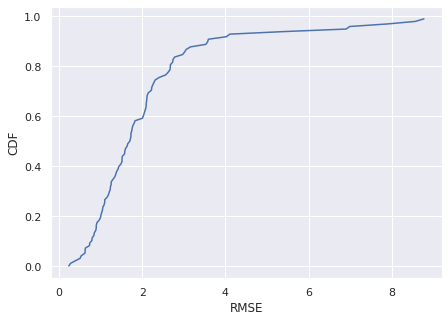

In [53]:
# CDF vs RMSE
errors = []
for i in range(0, len(testC)-cdf_range+1):
    lt = i
    rt = i+cdf_range
    tc = testC[lt : rt]
    tp = testP[lt : rt]
    err = math.sqrt(mean_squared_error(tc, tp)) / 100
    errors.append(err)

length = len(errors)
arr = np.array(errors)
x = np.sort(arr) 
y = np.arange(length) / float(length)

sns.set(rc={'figure.figsize':(7, 5)})
plt.xlabel('RMSE')
plt.ylabel('CDF')
plt.plot(x, y)
plt.show()

# cdf = 'Proposed_Model_RMSE'
# datas = {'RMSE':x, 'CDF':y}
# cdferr = pd.DataFrame(datas)
# cdferr.to_csv(f'/content/drive/MyDrive/Research Papers/Predicting Bitcoin Price/CSV/{cdf}.csv', index = False)

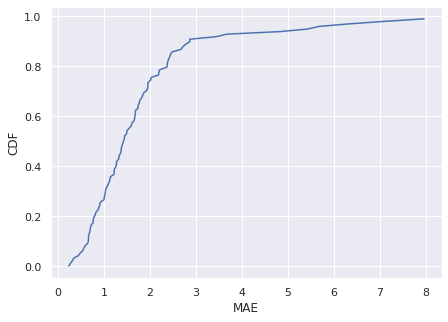

In [54]:
# CDF vs MAE
errors = []
for i in range(0, len(testC)-cdf_range+1):
    lt = i
    rt = i+cdf_range
    tc = testC[lt : rt]
    tp = testP[lt : rt]
    err = mean_absolute_error(tc, tp) / 100
    errors.append(err)

length = len(errors)
arr = np.array(errors)
x = np.sort(arr) 
y = np.arange(length) / float(length)

sns.set(rc={'figure.figsize':(7, 5)})
plt.xlabel('MAE')
plt.ylabel('CDF')
plt.plot(x, y)
plt.show()

# cdf = 'Proposed_Model_MAE'
# datas = {'MAE':x, 'CDF':y}
# cdferr = pd.DataFrame(datas)
# cdferr.to_csv(f'/content/drive/MyDrive/Research Papers/Predicting Bitcoin Price/CSV/{cdf}.csv', index = False)

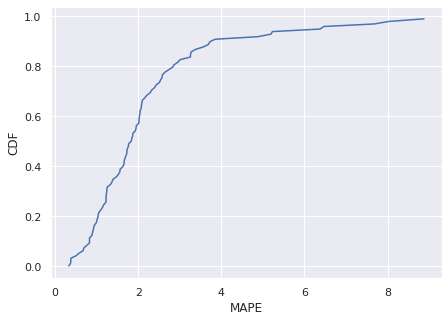

In [55]:
# CDF vs MAPE
errors = []
for i in range(0, len(testC)-cdf_range+1):
    lt = i
    rt = i+cdf_range
    tc = testC[lt : rt]
    tp = testP[lt : rt]
    err = mean_absolute_percentage_error(tc, tp)
    errors.append(err)

length = len(errors)
arr = np.array(errors)
x = np.sort(arr) 
y = np.arange(length) / float(length)

sns.set(rc={'figure.figsize':(7, 5)})
plt.xlabel('MAPE')
plt.ylabel('CDF')
plt.plot(x, y)
plt.show()

# cdf = 'Proposed_Model_MAPE'
# datas = {'RMSE':x, 'CDF':y}
# cdferr = pd.DataFrame(datas)
# cdferr.to_csv(f'/content/drive/MyDrive/Research Papers/Predicting Bitcoin Price/CSV/{cdf}.csv', index = False)

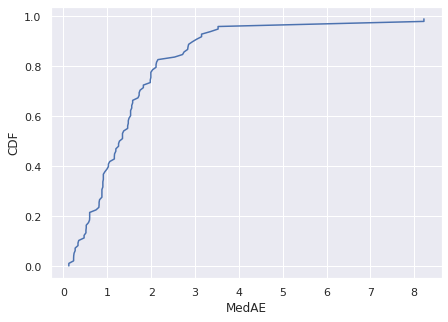

In [56]:
# CDF vs MedAE
errors = []
for i in range(0, len(testC)-cdf_range+1):
    lt = i
    rt = i+cdf_range
    tc = testC[lt : rt]
    tp = testP[lt : rt]
    err = median_absolute_error(tc, tp) / 100
    errors.append(err)

length = len(errors)
arr = np.array(errors)
x = np.sort(arr) 
y = np.arange(length) / float(length)

sns.set(rc={'figure.figsize':(7, 5)})
plt.xlabel('MedAE')
plt.ylabel('CDF')
plt.plot(x, y)
plt.show()

# cdf = 'Proposed_Model_MedAE'
# datas = {'RMSE':x, 'CDF':y}
# cdferr = pd.DataFrame(datas)
# cdferr.to_csv(f'/content/drive/MyDrive/Research Papers/Predicting Bitcoin Price/CSV/{cdf}.csv', index = False)

In [57]:
# Root Mean Squared Error
trainScore = math.sqrt(mean_squared_error(trainC, trainP)) / 100
print('Train Score: %.2f Root Mean Squared Error' %trainScore)
validScore = math.sqrt(mean_squared_error(validC, validP)) / 100
print('Valid Score: %.2f Root Mean Squared Error' %validScore)
testScore = math.sqrt(mean_squared_error(testC, testP)) / 100
print('Test Score: %.2f Root Mean Squared Error' %testScore)
print("")

# Mean Absolute Error
trainScore = mean_absolute_error(trainC, trainP) / 100
print('Train Score: %.2f Mean Absolute Error' %trainScore)
validScore = mean_absolute_error(validC, validP) / 100
print('Valid Score: %.2f Mean Absolute Error' %validScore)
testScore = mean_absolute_error(testC, testP) / 100
print('Test Score: %.2f Mean Absolute Error' %testScore)
print("")

# Mean Absolute Percantage Error
trainScore = mean_absolute_percentage_error(trainC, trainP)
print('Train Score: %.2f Mean Absolute Percentage Error' %trainScore)
validScore = mean_absolute_percentage_error(validC, validP)
print('Valid Score: %.2f Mean Absolute Percentage Error' %validScore)
testScore = mean_absolute_percentage_error(testC, testP)
print('Test Score: %.2f Mean Absolute Percentage Error' %testScore)
print("")

# Median Absolute Error
trainScore = median_absolute_error(trainC, trainP) / 100
print('Train Score: %.2f Median Absolute Error' %trainScore)
validScore = median_absolute_error(validC, validP) / 100
print('Valid Score: %.2f Median Absolute Error' %validScore)
testScore = median_absolute_error(testC, testP) / 100
print('Test Score: %.2f Median Absolute Error' %testScore)
print("")

# R2 Score
trainScore = r2_score(trainC, trainP) * 100
print('Train Score: %.2f R2 Score' %trainScore)
validScore = r2_score(validC, validP) * 100
print('Valid Score: %.2f R2 Score' %validScore)
testScore = r2_score(testC, testP) * 100
print('Test Score: %.2f R2 Score' %testScore)
print("")

Train Score: 3.76 Root Mean Squared Error
Valid Score: 5.00 Root Mean Squared Error
Test Score: 2.69 Root Mean Squared Error

Train Score: 2.02 Mean Absolute Error
Valid Score: 3.62 Mean Absolute Error
Test Score: 1.78 Mean Absolute Error

Train Score: 3.69 Mean Absolute Percentage Error
Valid Score: 3.42 Mean Absolute Percentage Error
Test Score: 2.20 Mean Absolute Percentage Error

Train Score: 0.95 Median Absolute Error
Valid Score: 2.39 Median Absolute Error
Test Score: 1.23 Median Absolute Error

Train Score: 98.85 R2 Score
Valid Score: 80.34 R2 Score
Test Score: 86.97 R2 Score



In [58]:
# Accuracy
def accuracy(c_list, p_list):
    lenth = len(c_list)
    cnt = 0
    for i in range(1, lenth):
        cdif = c_list[i] - c_list[i-1]
        pdif = p_list[i] - p_list[i-1]
        if cdif < 0 and pdif < 0 :
            cnt += 1
        elif cdif > 0 and pdif > 0 :
            cnt += 1
        elif cdif == 0 and pdif == 0 :
            cnt += 1
    acc = cnt / (lenth-1)
    return acc

trainScore = accuracy(trainC, trainP) * 100
print('Train Score: %.2f Accuracy' %trainScore)
validScore = accuracy(validC, validP) * 100
print('Valid Score: %.2f Accuracy' %validScore)
testScore = accuracy(testC, testP) * 100
print('Test Score: %.2f Accuracy' %testScore)
print("")

Train Score: 51.16 Accuracy
Valid Score: 51.52 Accuracy
Test Score: 50.51 Accuracy



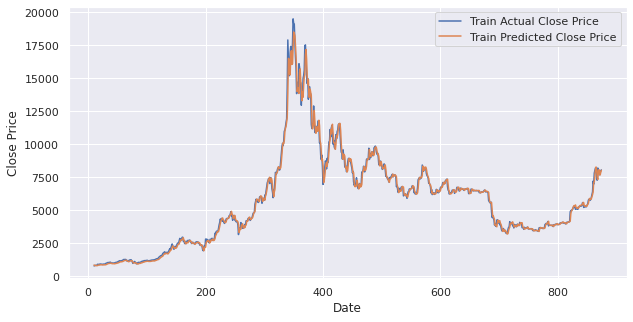

In [59]:
# Train Plot
sns.set(rc={'figure.figsize':(10, 5)})

trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[ : , : ] = np.nan
trainPredictPlot[window_size : train_size, : ] = trainPredict

trainActualPlot = np.empty_like(dataset)
trainActualPlot[ : , : ] = np.nan
trainActualPlot[window_size : train_size, : ] = dataset[window_size : train_size, : ]

plt.plot(scaler.inverse_transform(trainActualPlot), label = 'Train Actual Close Price')
plt.plot(trainPredictPlot, label = 'Train Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

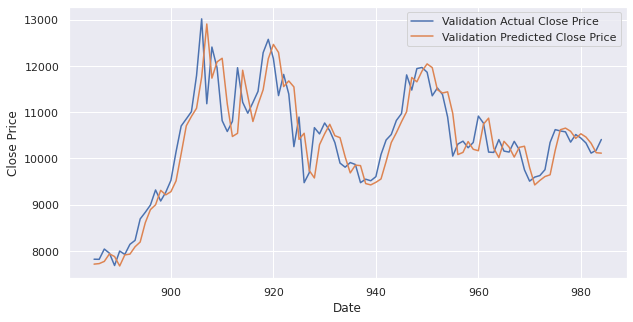

In [60]:
# Validation Plot
sns.set(rc={'figure.figsize':(10, 5)})

validPredictPlot = np.empty_like(dataset)
validPredictPlot[ : , : ] = np.nan
validPredictPlot[train_size + window_size : train_size + validation_size, : ] = validPredict

validActualPlot = np.empty_like(dataset)
validActualPlot[ : , : ] = np.nan
validActualPlot[train_size + window_size : train_size + validation_size, : ] = dataset[train_size + window_size : train_size + validation_size, : ]

plt.plot(scaler.inverse_transform(validActualPlot), label = 'Validation Actual Close Price')
plt.plot(validPredictPlot, label = 'Validation Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

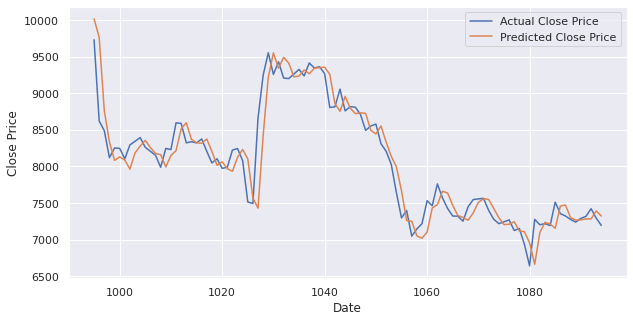

In [61]:
# Test Plot
sns.set(rc={'figure.figsize':(10, 5)})

testPredictPlot = np.empty_like(dataset)
testPredictPlot[: , :] = np.nan
testPredictPlot[len(dataset) - test_size + window_size : len(dataset), : ] = testPredict

testActualPlot = np.empty_like(dataset)
testActualPlot[ : , : ] = np.nan
testActualPlot[len(dataset) - test_size + window_size : len(dataset), : ] = dataset[len(dataset) - test_size + window_size : len(dataset), : ]

plt.plot(scaler.inverse_transform(testActualPlot), label = 'Actual Close Price')
plt.plot(testPredictPlot, label = 'Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

# img = 'Predicted_Close_Price_Proposed_Model'
# plt.savefig(f'/content/drive/MyDrive/Research Papers/Predicting Bitcoin Price/Image/{img}.pdf', dpi = 256, bbox_inches = "tight")

plt.show()

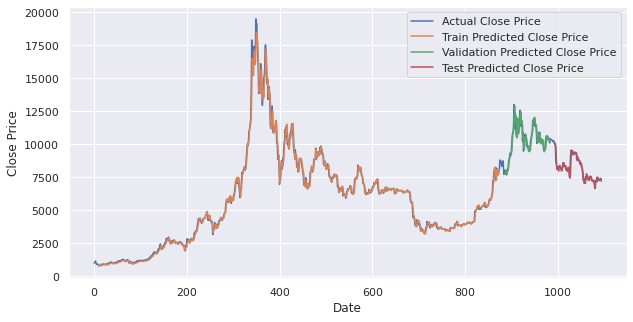

In [62]:
# Total Plot
sns.set(rc={'figure.figsize':(10, 5)})
plt.plot(scaler.inverse_transform(dataset), label = 'Actual Close Price')
plt.plot(trainPredictPlot, label = 'Train Predicted Close Price')
plt.plot(validPredictPlot, label = 'Validation Predicted Close Price')
plt.plot(testPredictPlot, label = 'Test Predicted Close Price')

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

                  Close    Predicted
Date                                
2017-01-01   998.325012          NaN
2017-01-02  1021.750000          NaN
2017-01-03  1043.839966          NaN
2017-01-04  1154.729980          NaN
2017-01-05  1013.380005          NaN
...                 ...          ...
2019-12-27  7290.088379  7269.258789
2019-12-28  7317.990234  7283.214355
2019-12-29  7422.652832  7282.442383
2019-12-30  7292.995117  7392.048828
2019-12-31  7193.599121  7321.242188

[1095 rows x 2 columns]


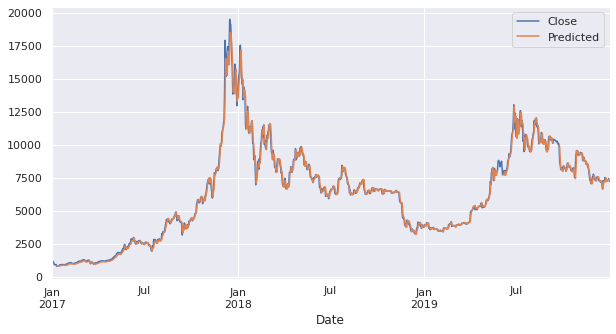

In [63]:
predictions = np.empty_like(dataset)
predictions[ : , : ] = np.nan
predictions[window_size : train_size, : ] = trainPredict
predictions[train_size + window_size : train_size + validation_size, : ] = validPredict
predictions[len(dataset) - test_size + window_size : len(dataset), : ] = testPredict

predictionsDF = pd.DataFrame(predictions, columns = ['Predicted'], index = dataframe.index)
ans = pd.concat([dataframe, predictionsDF], axis = 1)

print(ans)
ans.plot()
plt.show()

https://stackabuse.com/time-series-analysis-with-lstm-using-pythons-keras-library/